# Probabilities Estimation

`WIP`

## References

- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote04.html
- https://en.wikipedia.org/wiki/Bayes%27_theorem
- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote05.html
- https://en.wikipedia.org/wiki/Log_probability

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

## Intro

P(X, Y) distribution P of data X & Y.

* When we estimate P(X, Y) = P(X|Y) P(Y) = P(Y|X) P(X), called **Generative Learning**.
* When we only estimate P(Y|X) directly, called **Discriminative Learning**.

**Scenario** Coin Toss

Probability of getting heads P(H), when the coin is not a perfect one?

number of tosses = 10

10 samples are collected from tosses, D = { H, H, T, T, H, T, H, T, T, T }

here $n_H$ = 4 and $n_T$ = 6, hence

$P(H) \approx \frac{n_H}{n_H + n_T} = \frac{4}{4 + 6} = 0.4$

lets try to derive it...

## Maximum Likelihood Estimation(MLE)

Estimation mentioned above in the scenario is actually **Maximum Likelihood Estimation**. P(H) is estimation of likelihood of getting heads.

Steps for MLE-

1. Modeling assumption about the type of distribution data is coming from.
2. fitting the distribution parameter so that the sample/data observed is likely as possible.

for coin toss example the distribution observed is binomial distribution {0, 1}. binom distribution has two parameters n and $\theta$.

\begin{align}
    b(x;n,\theta) &= \binom{n}{x}{\theta^x}{(1-\theta)}^{(n-x)}\\
    \\
    where \\
    n &= \text{number of random events}\\
    \theta &= \text{probability of the event x}
\end{align}

in the scenario's context

\begin{align}
    P(D;\theta) &= \binom{n_H + n_T}{n_H}{\theta^{n_H}}{(1-\theta)}^{(n-n_H)}\\
    \\
    where \\
    n &= \text{number of independent bernoulli(binary) random events}\\
    \theta &= \text{probability of heads coming up} = P(H)
\end{align}

This translates to find a distribution $P(D|\theta)$ which has two parameters n and $\theta$ and it captures the distribution of n independent bernoulli random events(that generates random 0 and 1 ) such that $\theta$ is the probability of the coin coming up with heads.

### Principle

find $\hat{\theta}$ to maximize the likelihood of the data, $P(D;\theta)$:
    
$\hat{\theta}_{MLE} = {argmax\atop{\theta}} P(D; \theta)$

to maximize the value from a equation generally the derivative of the equation is solved while equating it to 0.

two steps to solve above equation

1. apply log to the function (In computer science we dont prefer multiplying probabilities due to muliple reasons(see reference section). Hence we take log and convert multiplication to addition.)
2. calculate derivative of equation and equate it to 0.

\begin{align}
    \hat{\theta}_{MLE} &= {argmax\atop{\theta}} P(D; \theta)\\
                       &= {argmax\atop{\theta}} \binom{n_H + n_T}{n_H}{\theta^{n_H}}{(1-\theta)}^{(n_T)}\\
                       &= {argmax\atop{\theta}} \log{[ \binom{n_H + n_T}{n_H}{\theta^{n_H}}{(1-\theta)}^{(n_T)}]}\\
                       &= {argmax\atop{\theta}} \log{[ \binom{n_H + n_T}{n_H} ]} + \log{[\theta^{n_H}]} + \log{[(1-\theta)^{n_T}]}\\
                       &\downarrow \frac{\partial}{\partial \theta}\text{ calculate derivative}\\
    \frac{n_H}{\theta} + \frac{n_T}{1 - \theta} &= 0\\
    \hat{\theta} &= \frac{n_H}{n_H + n_T}\\
    \\
    \text{where } \theta \in [0, 1]
\end{align}


- 

In [2]:
np.random.seed(0)

In [3]:
events = [ "T", "H" ]

n_events = 100
D = np.random.choice(events, n_events)

D

array(['T', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T',
       'H', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'H',
       'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'H',
       'T', 'T', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'T', 'H',
       'H', 'H', 'H', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'H',
       'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'T', 'H', 'H', 'T',
       'H', 'T', 'T', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H',
       'H', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T'], dtype='<U1')

In [4]:
from scipy.stats import binom

In [5]:
n = dict(zip(*np.unique(D, return_counts=True)))
n

{'H': 56, 'T': 44}

In [6]:
theta = n['H']/(n['H'] + n['T'])
theta

0.56

In [7]:
binom_distribution = binom(n=n_events, p=theta)

In [10]:
x = np.arange(binom_distribution.ppf(0.01), binom_distribution.ppf(0.99))

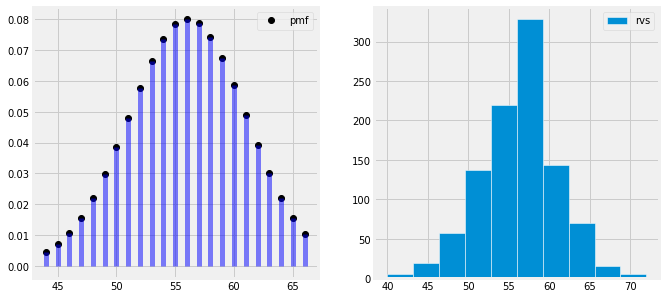

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(x, binom_distribution.pmf(x), 'ko', label='pmf')
# ax[0].plot(x, binom_distribution.cdf(x), '--', label='cdf')
ax[0].vlines(x, 0, binom_distribution.pmf(x), colors='b', lw=5, alpha=0.5)
ax[0].legend()

ax[1].hist(binom_distribution.rvs(1000), label='rvs', edgecolor='white', bins=10, density=False)
ax[1].legend()

plt.show()

Likelihood of getting 56 heads in 100 coin toss trials have the highest probability with 56% success rate. Hence the above plot represents maximum likelihood estimation of getting a head(success event) out of 100 trials with success rate of 56%, number of successes on x axis and probability of success on y axis.

This could be unreasonable, when

1. we only have heads, less number of observations(less data)
2. easily can overfit if data is not enough

## Maximum A Posteriori Probability Estimation(MAP)

## Naive Bayes

\begin{align}
    P(Y=y | X=x) &= \frac{P(X=x | Y=y) P(Y=y)}{P(X=x)}\\
    \\
    &\text{Where } \\
    P(X=x | Y=y) &= \prod_{\alpha=1}^{d} P([X]_\alpha = x_\alpha| Y = y)
\end{align}


- Naively assumes that all the features used are independently distrubuted variables given the label Y.
- for example given that there is an email where all the words are independent given the label spam/ham.

## Bayes Classifier

\begin{align*}
    h(\vec{x}) &= {argmax\atop{y}} \frac{P(\vec{x} | y) P(y)}{z}\\
    \\
    &= {argmax\atop{y}} P(y) \prod_{\alpha} P([\vec{X}]_\alpha | y)\\
    \\
    &= {argmax\atop{y}} ( log(P(y) + \sum_\alpha log P([\vec{X}]_\alpha | y))
\end{align*}


P.S. - In computer science we dont prefer multiplying probabilities due to muliple reasons(see reference section). Hence we take log and convert multiplication to addition.